In [1]:
%cd ..

/home/juanhevia/IDIL


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import pickle as pkl
import generate_trajectories as traj_utils
import utils as nb_utils
from collections import defaultdict

pygame 2.6.0 (SDL 2.28.4, Python 3.8.19)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
import importlib
import scipy.stats as stats

In [4]:
importlib.reload(nb_utils)

<module 'utils' from '/home/juanhevia/IDIL/notebooks/utils.py'>

In [5]:
RUNS = [
"es-100-01J4XR6C47AKQ5KNJWNR679E8R-synth_extra_trajs-0809",
"es-100-01J4XNDCER2DMYYRXEJZXJ2271-synth_extra_trajs-0809",
"es-100-01J4XJMMP9N8S3TQN4SESDZCTR-synth_extra_trajs-0809",
"es-100-01J4XFW8RHVVYCTJ5Y3C2BTBF9-synth_extra_trajs-0809",
"es-100-01J4XD2HX2Y2FBMBEWEE6RGH40-synth_extra_trajs-0809",
"es-60-01J4XA99JZKFM2DW2EEA0XSZK7-synth_extra_trajs-0809",
"es-60-01J4X7FCX4VVR4C8QJ01PCR57Q-synth_extra_trajs-0809",
"es-60-01J4X4MRGFV2KTEQJW4GNMQKXS-synth_extra_trajs-0809",
"es-60-01J4X1WBK8J8F3XXHZBVQSGMP2-synth_extra_trajs-0809",
"es-60-01J4WYYDPHHAGRHK4Q4TS1GM0Y-synth_extra_trajs-0809",
"es-20-01J4WW1WMZN9APJJ8NF115HQDC-synth_extra_trajs-0809",
"es-20-01J4WS66ZBGJCDXQ4QTE33S2HX-synth_extra_trajs-0809",
"es-20-01J4WP99BEQC5G4DNBK4S7RYXQ-synth_extra_trajs-0809",
"es-20-01J4WKD4YREQT0RPPCFVT3BFSA-synth_extra_trajs-0809",
"es-20-01J4WGGVYCEYXKM7DZ1TQT2KFQ-synth_extra_trajs-0809",
"es-0-01J4WDKJRBQJA5TRN78KD9V55P-synth_extra_trajs-0809",
"es-0-01J4W9R49RKQ9060E1VBXGY6XF-synth_extra_trajs-0809",
"es-0-01J4W6Y6HFM2JA6YMBZVC3B9YA-synth_extra_trajs-0809",
"es-0-01J4W44NBPQP04TMKJQZ9FK38G-synth_extra_trajs-0809",
"es-0-01J4W1ANG5AXDA4SZSPHKH12J3-synth_extra_trajs-0809",
]

ENV_NAME = "CleanupSingle-v0"

In [6]:
agents = nb_utils.get_trained_models(runs=RUNS, env_name=ENV_NAME)

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XR6C47AKQ5KNJWNR679E8R-synth_extra_trajs-0809/2024-08-10_03-59-01/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XR6C47AKQ5KNJWNR679E8R-synth_extra_trajs-0809/2024-08-10_03-59-01/model/iq_CleanupSingle-v0_n70_l70_best_pi
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XNDCER2DMYYRXEJZXJ2271-synth_extra_trajs-0809/2024-08-10_03-10-25/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XNDCER2DMYYRXEJZXJ2271-synth_extra_trajs-0809/2024-08-10_03-10-25/model/iq_CleanupSingle-v0_n70_l70_best_pi
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XJMMP9N8S3TQN4SESDZCTR-synth_extra_trajs-0809/2024-08-10_02-21-57/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XJMMP9N8S3TQN4SESDZCTR

In [7]:
trajectories = nb_utils.get_agent_trajectories(runs=RUNS, env_name=ENV_NAME, num_trajectories=10)

  0%|          | 0/20 [00:00<?, ?it/s]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XR6C47AKQ5KNJWNR679E8R-synth_extra_trajs-0809/2024-08-10_03-59-01/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XR6C47AKQ5KNJWNR679E8R-synth_extra_trajs-0809/2024-08-10_03-59-01/model/iq_CleanupSingle-v0_n70_l70_best_pi


  5%|▌         | 1/20 [00:02<00:46,  2.47s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XNDCER2DMYYRXEJZXJ2271-synth_extra_trajs-0809/2024-08-10_03-10-25/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XNDCER2DMYYRXEJZXJ2271-synth_extra_trajs-0809/2024-08-10_03-10-25/model/iq_CleanupSingle-v0_n70_l70_best_pi


 10%|█         | 2/20 [00:04<00:41,  2.32s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XJMMP9N8S3TQN4SESDZCTR-synth_extra_trajs-0809/2024-08-10_02-21-57/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XJMMP9N8S3TQN4SESDZCTR-synth_extra_trajs-0809/2024-08-10_02-21-57/model/iq_CleanupSingle-v0_n70_l70_best_pi


 15%|█▌        | 3/20 [00:06<00:38,  2.27s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XFW8RHVVYCTJ5Y3C2BTBF9-synth_extra_trajs-0809/2024-08-10_01-33-41/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XFW8RHVVYCTJ5Y3C2BTBF9-synth_extra_trajs-0809/2024-08-10_01-33-41/model/iq_CleanupSingle-v0_n70_l70_best_pi


 20%|██        | 4/20 [00:10<00:44,  2.77s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XD2HX2Y2FBMBEWEE6RGH40-synth_extra_trajs-0809/2024-08-10_00-44-41/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XD2HX2Y2FBMBEWEE6RGH40-synth_extra_trajs-0809/2024-08-10_00-44-41/model/iq_CleanupSingle-v0_n70_l70_best_pi


 25%|██▌       | 5/20 [00:12<00:37,  2.48s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-60-01J4XA99JZKFM2DW2EEA0XSZK7-synth_extra_trajs-0809/2024-08-09_23-55-56/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-60-01J4XA99JZKFM2DW2EEA0XSZK7-synth_extra_trajs-0809/2024-08-09_23-55-56/model/iq_CleanupSingle-v0_n70_l70_best_pi


 30%|███       | 6/20 [00:14<00:34,  2.50s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-60-01J4X7FCX4VVR4C8QJ01PCR57Q-synth_extra_trajs-0809/2024-08-09_23-06-51/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-60-01J4X7FCX4VVR4C8QJ01PCR57Q-synth_extra_trajs-0809/2024-08-09_23-06-51/model/iq_CleanupSingle-v0_n70_l70_best_pi


 35%|███▌      | 7/20 [00:17<00:31,  2.46s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-60-01J4X4MRGFV2KTEQJW4GNMQKXS-synth_extra_trajs-0809/2024-08-09_22-17-21/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-60-01J4X4MRGFV2KTEQJW4GNMQKXS-synth_extra_trajs-0809/2024-08-09_22-17-21/model/iq_CleanupSingle-v0_n70_l70_best_pi


 40%|████      | 8/20 [00:20<00:33,  2.76s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-60-01J4X1WBK8J8F3XXHZBVQSGMP2-synth_extra_trajs-0809/2024-08-09_21-29-04/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-60-01J4X1WBK8J8F3XXHZBVQSGMP2-synth_extra_trajs-0809/2024-08-09_21-29-04/model/iq_CleanupSingle-v0_n70_l70_best_pi


 45%|████▌     | 9/20 [00:23<00:30,  2.74s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-60-01J4WYYDPHHAGRHK4Q4TS1GM0Y-synth_extra_trajs-0809/2024-08-09_20-37-46/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-60-01J4WYYDPHHAGRHK4Q4TS1GM0Y-synth_extra_trajs-0809/2024-08-09_20-37-46/model/iq_CleanupSingle-v0_n70_l70_best_pi


 50%|█████     | 10/20 [00:26<00:27,  2.74s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-20-01J4WW1WMZN9APJJ8NF115HQDC-synth_extra_trajs-0809/2024-08-09_19-47-14/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-20-01J4WW1WMZN9APJJ8NF115HQDC-synth_extra_trajs-0809/2024-08-09_19-47-14/model/iq_CleanupSingle-v0_n70_l70_best_pi


 55%|█████▌    | 11/20 [00:28<00:23,  2.59s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-20-01J4WS66ZBGJCDXQ4QTE33S2HX-synth_extra_trajs-0809/2024-08-09_18-57-09/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-20-01J4WS66ZBGJCDXQ4QTE33S2HX-synth_extra_trajs-0809/2024-08-09_18-57-09/model/iq_CleanupSingle-v0_n70_l70_best_pi


 60%|██████    | 12/20 [00:30<00:20,  2.50s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-20-01J4WP99BEQC5G4DNBK4S7RYXQ-synth_extra_trajs-0809/2024-08-09_18-06-25/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-20-01J4WP99BEQC5G4DNBK4S7RYXQ-synth_extra_trajs-0809/2024-08-09_18-06-25/model/iq_CleanupSingle-v0_n70_l70_best_pi


 65%|██████▌   | 13/20 [00:33<00:18,  2.69s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-20-01J4WKD4YREQT0RPPCFVT3BFSA-synth_extra_trajs-0809/2024-08-09_17-16-05/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-20-01J4WKD4YREQT0RPPCFVT3BFSA-synth_extra_trajs-0809/2024-08-09_17-16-05/model/iq_CleanupSingle-v0_n70_l70_best_pi


 70%|███████   | 14/20 [00:36<00:16,  2.81s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-20-01J4WGGVYCEYXKM7DZ1TQT2KFQ-synth_extra_trajs-0809/2024-08-09_16-25-42/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-20-01J4WGGVYCEYXKM7DZ1TQT2KFQ-synth_extra_trajs-0809/2024-08-09_16-25-42/model/iq_CleanupSingle-v0_n70_l70_best_pi


 75%|███████▌  | 15/20 [00:39<00:13,  2.62s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J4WDKJRBQJA5TRN78KD9V55P-synth_extra_trajs-0809/2024-08-09_15-34-46/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J4WDKJRBQJA5TRN78KD9V55P-synth_extra_trajs-0809/2024-08-09_15-34-46/model/iq_CleanupSingle-v0_n70_l70_best_pi


 80%|████████  | 16/20 [00:41<00:10,  2.54s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J4W9R49RKQ9060E1VBXGY6XF-synth_extra_trajs-0809/2024-08-09_14-27-19/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J4W9R49RKQ9060E1VBXGY6XF-synth_extra_trajs-0809/2024-08-09_14-27-19/model/iq_CleanupSingle-v0_n70_l70_best_pi


 85%|████████▌ | 17/20 [00:44<00:07,  2.66s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J4W6Y6HFM2JA6YMBZVC3B9YA-synth_extra_trajs-0809/2024-08-09_13-38-13/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J4W6Y6HFM2JA6YMBZVC3B9YA-synth_extra_trajs-0809/2024-08-09_13-38-13/model/iq_CleanupSingle-v0_n70_l70_best_pi


 90%|█████████ | 18/20 [00:47<00:05,  2.84s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J4W44NBPQP04TMKJQZ9FK38G-synth_extra_trajs-0809/2024-08-09_12-49-19/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J4W44NBPQP04TMKJQZ9FK38G-synth_extra_trajs-0809/2024-08-09_12-49-19/model/iq_CleanupSingle-v0_n70_l70_best_pi


 95%|█████████▌| 19/20 [00:50<00:02,  2.91s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J4W1ANG5AXDA4SZSPHKH12J3-synth_extra_trajs-0809/2024-08-09_12-00-10/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J4W1ANG5AXDA4SZSPHKH12J3-synth_extra_trajs-0809/2024-08-09_12-00-10/model/iq_CleanupSingle-v0_n70_l70_best_pi


100%|██████████| 20/20 [00:52<00:00,  2.64s/it]


In [8]:
cum_rewards = nb_utils.get_cumulative_rewards(trajectories, agents)

There are 4 kvals
Each kval has 50 cum_rewards, matching the 5 x 10 trajectories generated for each agent (using key = 100)


(-100.0, -10.0)

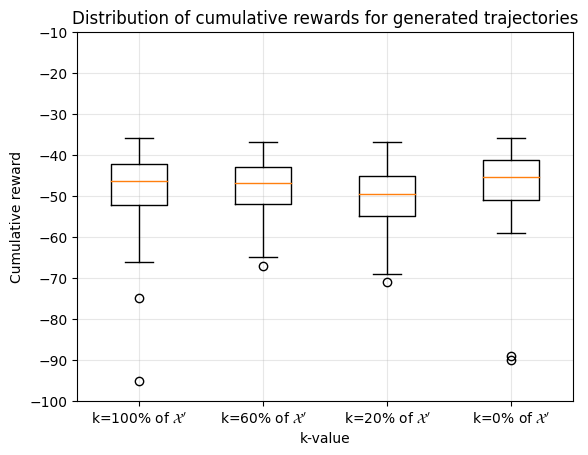

In [9]:
nb_utils.plot_cum_rewards(cum_rewards)
plt.gca().set_ylim([-100, -10])

In [10]:
pd.DataFrame(cum_rewards).describe()

,100,60,20,0
count,50.000000,50.000000,50.000000,50.000000
mean,-54.240000,-62.040000,-56.920000,-60.280000
std,31.850134,46.873238,29.704559,43.678809
min,-200.000000,-200.000000,-200.000000,-200.000000
25%,-52.250000,-52.000000,-55.000000,-51.000000
50%,-46.500000,-47.000000,-49.500000,-45.500000
75%,-42.250000,-43.000000,-45.250000,-41.250000
max,-36.000000,-37.000000,-37.000000,-36.000000


## evaluate mean differences between K values

In [11]:
cum_rewards[20]

[-38,
 -50,
 -49,
 -44,
 -50,
 -45,
 -52,
 -48,
 -50,
 -51,
 -46,
 -52,
 -52,
 -50,
 -59,
 -61,
 -47,
 -41,
 -69,
 -37,
 -50,
 -44,
 -49,
 -56,
 -44,
 -50,
 -137,
 -48,
 -56,
 -165,
 -49,
 -48,
 -47,
 -200,
 -60,
 -57,
 -56,
 -49,
 -40,
 -71,
 -49,
 -63,
 -51,
 -45,
 -50,
 -44,
 -44,
 -42,
 -43,
 -48]

In [12]:
test_baseline = 0
test_kvals = [20, 60, 100]

for k in test_kvals:
    print(f"K = {k}")
    res = stats.ttest_ind(cum_rewards[test_baseline], cum_rewards[k], equal_var=False)
    print(res)
    if res.pvalue < 0.05:
        print("Significant")
    else:
        print("Not significant")

    print("---" * 4)

K = 20
Ttest_indResult(statistic=-0.4497867688839735, pvalue=0.6539914430941691)
Not significant
------------
K = 60
Ttest_indResult(statistic=0.19424253082663195, pvalue=0.8463900569718343)
Not significant
------------
K = 100
Ttest_indResult(statistic=-0.7900631690957246, pvalue=0.4315763428407936)
Not significant
------------


# Evaluate on test data

In [13]:
# load test data for CleanupSingle-v0
# load test data
import os

with open(os.path.join("idil_train", "test_data", "CleanupSingle-v0_50-TEST.pkl"), "rb") as f:
    test_data = pkl.load(f)

In [14]:
accs_by_k = nb_utils.compute_accuracy_by_kval(test_data=test_data, agents=agents)

50it [00:08,  6.19it/s]


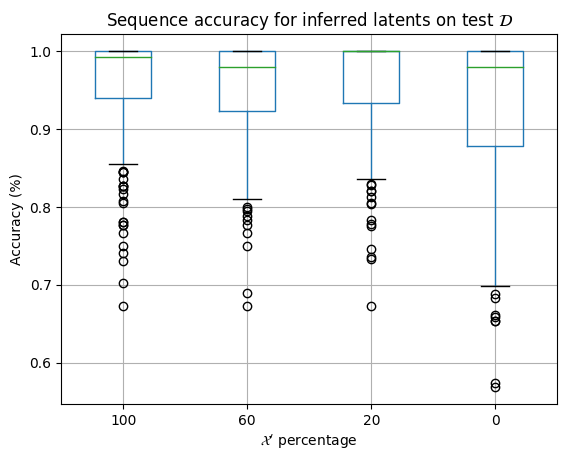

In [15]:
nb_utils.plot_sequence_accuracy_boxplot(accs_by_k)

In [16]:
pd.DataFrame(accs_by_k).describe()

,100,60,20,0
count,250.000000,250.000000,250.000000,250.000000
mean,0.960407,0.952086,0.957714,0.929977
std,0.063340,0.063372,0.064906,0.096606
min,0.672131,0.673077,0.673077,0.568966
25%,0.938776,0.923077,0.933333,0.877675
50%,0.991525,0.978723,1.000000,0.979158
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


# Evaluate `fixed_pi` models

In [15]:
RUNS = [
"es-100-01J50HYWVA9B1VKTJ3Z1Q59ZG9-synth_extra_trajs-fixedpi-0810",
"es-100-01J50FYKH42PXN6JGMP4PV3Z9W-synth_extra_trajs-fixedpi-0810",
"es-100-01J50DYTWZ1D3Q4PFKE6VHN54M-synth_extra_trajs-fixedpi-0810",
"es-100-01J50BZ12TGCPCAFBGQD3DAH9A-synth_extra_trajs-fixedpi-0810",
"es-100-01J50A0HH3JC5EB39KEAKF61QR-synth_extra_trajs-fixedpi-0810",
"es-60-01J5081T4SPE48MV40K1W3495A-synth_extra_trajs-fixedpi-0810",
"es-60-01J5063CG8MZMTKJYDP9C7K7AW-synth_extra_trajs-fixedpi-0810",
"es-60-01J50441MDA9JSTSETH5AGNEBW-synth_extra_trajs-fixedpi-0810",
"es-60-01J5025B59AQHG6VXN5BZDFCW1-synth_extra_trajs-fixedpi-0810",
"es-60-01J5005X7E5HSTPSJ4K7S38Z3J-synth_extra_trajs-fixedpi-0810",
"es-20-01J4ZY79P0D0WKME7MEKMSNZFE-synth_extra_trajs-fixedpi-0810",
"es-20-01J4ZW7YQ0GEQSF4C0K3JS29TW-synth_extra_trajs-fixedpi-0810",
"es-20-01J4ZT8FSGZNZM5FA64DR61W8R-synth_extra_trajs-fixedpi-0810",
"es-20-01J4ZR9R661ATZJRNBHM3EFTW1-synth_extra_trajs-fixedpi-0810",
"es-20-01J4ZPAF1W7FSYYZ4YPC74PSRR-synth_extra_trajs-fixedpi-0810",
"es-0-01J4ZMCF4YE5GYMVG3XBAWZ70A-synth_extra_trajs-fixedpi-0810",
"es-0-01J4ZJE2CRGHDXKR5MEF0M709G-synth_extra_trajs-fixedpi-0810",
"es-0-01J4ZGE3N4HV2XMP9NEY8B3A7X-synth_extra_trajs-fixedpi-0810",
"es-0-01J4ZEE268ZTT50GR19M68JQNC-synth_extra_trajs-fixedpi-0810",
"es-0-01J4ZCDQKQ0GMHVGPWB3041F4E-synth_extra_trajs-fixedpi-0810",
]

In [15]:
from idil_algs.baselines.IQLearn.dataset.expert_dataset import ExpertDataset
import os

expert_dataset = ExpertDataset(os.path.join("idil_train","extra_trajectories/CleanupSingle-v0_500-EXPERT-DIST.pkl"))

In [45]:
importlib.reload(nb_utils)

<module 'utils' from '/home/juanhevia/IDIL/notebooks/utils.py'>

In [46]:
importlib.reload(traj_utils)

<module 'generate_trajectories' from '/home/juanhevia/IDIL/notebooks/generate_trajectories.py'>

In [62]:
agents_fixed_pi = nb_utils.get_trained_models(runs=RUNS, env_name=ENV_NAME, 
                                              load_micro=False, expert_dataset=expert_dataset)
trajectories_fixed_pi = nb_utils.get_agent_trajectories(runs=RUNS, env_name=ENV_NAME, num_trajectories=10, 
                                                        load_micro=False, expert_dataset=expert_dataset)

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J50HYWVA9B1VKTJ3Z1Q59ZG9-synth_extra_trajs-fixedpi-0810/2024-08-11_06-07-47/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J50FYKH42PXN6JGMP4PV3Z9W-synth_extra_trajs-fixedpi-0810/2024-08-11_05-32-41/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J50DYTWZ1D3Q4PFKE6VHN54M-synth_extra_trajs-fixedpi-0810/2024-08-11_04-57-51/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J50BZ12TGCPCAFBGQD3DAH9A-synth_extra_trajs-fixedpi-0810/2024-08-11_04-23-00/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J50A0HH3JC5EB39KEAKF61QR-synth_extra_trajs-fixedpi-0810/2024-08-11_03-48-53/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v

  0%|          | 0/20 [00:00<?, ?it/s]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J50HYWVA9B1VKTJ3Z1Q59ZG9-synth_extra_trajs-fixedpi-0810/2024-08-11_06-07-47/model/iq_CleanupSingle-v0_n70_l70_best_tx


  5%|▌         | 1/20 [00:05<01:35,  5.03s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J50FYKH42PXN6JGMP4PV3Z9W-synth_extra_trajs-fixedpi-0810/2024-08-11_05-32-41/model/iq_CleanupSingle-v0_n70_l70_best_tx


 10%|█         | 2/20 [00:10<01:35,  5.32s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J50DYTWZ1D3Q4PFKE6VHN54M-synth_extra_trajs-fixedpi-0810/2024-08-11_04-57-51/model/iq_CleanupSingle-v0_n70_l70_best_tx


 15%|█▌        | 3/20 [00:15<01:29,  5.24s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J50BZ12TGCPCAFBGQD3DAH9A-synth_extra_trajs-fixedpi-0810/2024-08-11_04-23-00/model/iq_CleanupSingle-v0_n70_l70_best_tx


 20%|██        | 4/20 [00:20<01:21,  5.12s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J50A0HH3JC5EB39KEAKF61QR-synth_extra_trajs-fixedpi-0810/2024-08-11_03-48-53/model/iq_CleanupSingle-v0_n70_l70_best_tx


 25%|██▌       | 5/20 [00:25<01:16,  5.09s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-60-01J5081T4SPE48MV40K1W3495A-synth_extra_trajs-fixedpi-0810/2024-08-11_03-14-37/model/iq_CleanupSingle-v0_n70_l70_best_tx


 30%|███       | 6/20 [00:30<01:11,  5.09s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-60-01J5063CG8MZMTKJYDP9C7K7AW-synth_extra_trajs-fixedpi-0810/2024-08-11_02-40-32/model/iq_CleanupSingle-v0_n70_l70_best_tx


 35%|███▌      | 7/20 [00:35<01:06,  5.10s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-60-01J50441MDA9JSTSETH5AGNEBW-synth_extra_trajs-fixedpi-0810/2024-08-11_02-05-56/model/iq_CleanupSingle-v0_n70_l70_best_tx


 40%|████      | 8/20 [00:40<01:01,  5.09s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-60-01J5025B59AQHG6VXN5BZDFCW1-synth_extra_trajs-fixedpi-0810/2024-08-11_01-31-41/model/iq_CleanupSingle-v0_n70_l70_best_tx


 45%|████▌     | 9/20 [00:46<00:55,  5.08s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-60-01J5005X7E5HSTPSJ4K7S38Z3J-synth_extra_trajs-fixedpi-0810/2024-08-11_00-57-03/model/iq_CleanupSingle-v0_n70_l70_best_tx


 50%|█████     | 10/20 [00:51<00:51,  5.10s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-20-01J4ZY79P0D0WKME7MEKMSNZFE-synth_extra_trajs-fixedpi-0810/2024-08-11_00-22-51/model/iq_CleanupSingle-v0_n70_l70_best_tx


 55%|█████▌    | 11/20 [00:56<00:45,  5.09s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-20-01J4ZW7YQ0GEQSF4C0K3JS29TW-synth_extra_trajs-fixedpi-0810/2024-08-10_23-48-16/model/iq_CleanupSingle-v0_n70_l70_best_tx


 60%|██████    | 12/20 [01:01<00:40,  5.07s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-20-01J4ZT8FSGZNZM5FA64DR61W8R-synth_extra_trajs-fixedpi-0810/2024-08-10_23-13-36/model/iq_CleanupSingle-v0_n70_l70_best_tx


 65%|██████▌   | 13/20 [01:06<00:35,  5.07s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-20-01J4ZR9R661ATZJRNBHM3EFTW1-synth_extra_trajs-fixedpi-0810/2024-08-10_22-39-20/model/iq_CleanupSingle-v0_n70_l70_best_tx


 70%|███████   | 14/20 [01:11<00:30,  5.03s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-20-01J4ZPAF1W7FSYYZ4YPC74PSRR-synth_extra_trajs-fixedpi-0810/2024-08-10_22-04-46/model/iq_CleanupSingle-v0_n70_l70_best_tx


 75%|███████▌  | 15/20 [01:16<00:25,  5.02s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J4ZMCF4YE5GYMVG3XBAWZ70A-synth_extra_trajs-fixedpi-0810/2024-08-10_21-30-55/model/iq_CleanupSingle-v0_n70_l70_best_tx


 80%|████████  | 16/20 [01:21<00:20,  5.07s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J4ZJE2CRGHDXKR5MEF0M709G-synth_extra_trajs-fixedpi-0810/2024-08-10_20-56-50/model/iq_CleanupSingle-v0_n70_l70_best_tx


 85%|████████▌ | 17/20 [01:26<00:15,  5.09s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J4ZGE3N4HV2XMP9NEY8B3A7X-synth_extra_trajs-fixedpi-0810/2024-08-10_20-21-54/model/iq_CleanupSingle-v0_n70_l70_best_tx


 90%|█████████ | 18/20 [01:31<00:10,  5.08s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J4ZEE268ZTT50GR19M68JQNC-synth_extra_trajs-fixedpi-0810/2024-08-10_19-46-56/model/iq_CleanupSingle-v0_n70_l70_best_tx


 95%|█████████▌| 19/20 [01:36<00:05,  5.06s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J4ZCDQKQ0GMHVGPWB3041F4E-synth_extra_trajs-fixedpi-0810/2024-08-10_19-11-48/model/iq_CleanupSingle-v0_n70_l70_best_tx


100%|██████████| 20/20 [01:41<00:00,  5.08s/it]


There are 4 kvals
Each kval has 50 cum_rewards, matching the 5 x 10 trajectories generated for each agent (using key = 100)


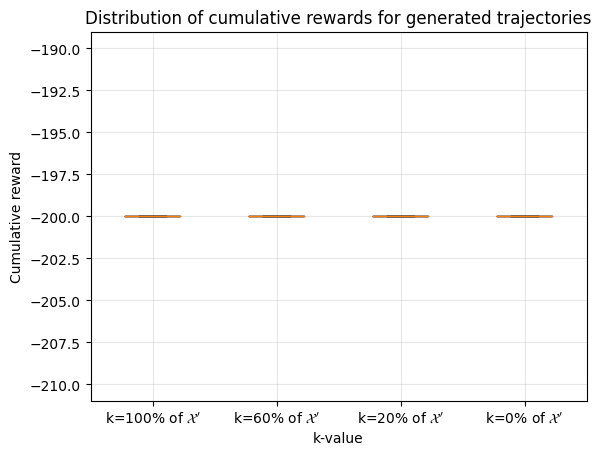

In [63]:
cum_rewards_fixed_pi = nb_utils.get_cumulative_rewards(trajectories_fixed_pi, agents_fixed_pi)
nb_utils.plot_cum_rewards(cum_rewards_fixed_pi)
# plt.gca().set_ylim([-100, -10])

In [67]:
trajectories_fixed_pi[0][0]['rewards'][0]

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1]

In [60]:
pd.DataFrame(cum_rewards_fixed_pi).describe()

,100,60,20,0
count,50.0,50.0,50.0,50.0
mean,-200.0,-200.0,-200.0,-200.0
std,0.0,0.0,0.0,0.0
min,-200.0,-200.0,-200.0,-200.0
25%,-200.0,-200.0,-200.0,-200.0
50%,-200.0,-200.0,-200.0,-200.0
75%,-200.0,-200.0,-200.0,-200.0
max,-200.0,-200.0,-200.0,-200.0


In [21]:
accs_by_k_fixed_pi = nb_utils.compute_accuracy_by_kval(test_data=test_data, agents=agents_fixed_pi)

50it [00:08,  6.22it/s]


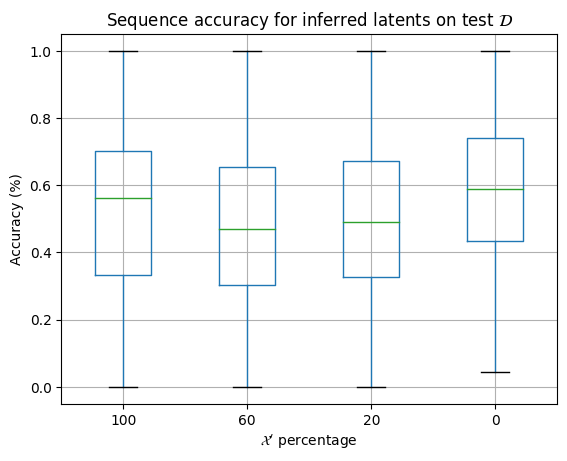

In [33]:
nb_utils.plot_sequence_accuracy_boxplot(accs_by_k_fixed_pi)

In [23]:
pd.DataFrame(accs_by_k_fixed_pi).describe()

,100,60,20,0
count,250.000000,250.000000,250.000000,250.000000
mean,0.528204,0.468221,0.500402,0.581118
std,0.236021,0.231161,0.228577,0.222254
min,0.000000,0.000000,0.000000,0.043478
25%,0.333333,0.302637,0.326198,0.432559
50%,0.560488,0.469337,0.489996,0.588235
75%,0.702128,0.655172,0.670977,0.740338
max,1.000000,1.000000,1.000000,1.000000


## why the weird `reward` distribution?

In [50]:
agents_fixed_pi[20][0].pi_agent

# Evaluate `randomized` models

In [7]:
RUNS = [
"es-100-01J52ANXG5XY399ZV6TYYK2NT7-extra_synth_traj-bm_randomize-0810",
"es-100-01J528Q1XNNQ2ZZMBV3JXMMZPS-extra_synth_traj-bm_randomize-0810",
"es-100-01J526PFX24TGFW0R2QW8WSTRF-extra_synth_traj-bm_randomize-0810",
"es-100-01J524MVN9J1G7KKYJP9A0ZCGN-extra_synth_traj-bm_randomize-0810",
"es-100-01J522K1GSZA7A2MV6YS6HSG6X-extra_synth_traj-bm_randomize-0810",
"es-60-01J520JNB2S31MSVX4B5C4ZDVD-extra_synth_traj-bm_randomize-0810",
"es-60-01J51YJ45ZHB94N7FD20FTA8QB-extra_synth_traj-bm_randomize-0810",
"es-60-01J51WJ8FNX81A3EHFCK3RM8CQ-extra_synth_traj-bm_randomize-0810",
"es-60-01J51TEGMPA8CY9J9AK790KKXW-extra_synth_traj-bm_randomize-0810",
"es-60-01J51RCKH301BV1GQ4W5QN0DSP-extra_synth_traj-bm_randomize-0810",
"es-20-01J51PBFS8HR2B5FJW267V2WM8-extra_synth_traj-bm_randomize-0810",
"es-20-01J51M6E1N5FAV5HYRJVBB9D6N-extra_synth_traj-bm_randomize-0810",
"es-20-01J51J56K4M9ZD9HG7BTG3JECR-extra_synth_traj-bm_randomize-0810",
"es-20-01J51G7GTEQB1QR4VSYP5F4BR5-extra_synth_traj-bm_randomize-0810",
"es-20-01J51E6YPNRFGV4XA4ES01ZXDF-extra_synth_traj-bm_randomize-0810",
"es-0-01J51C6RB3G8FQHK1Y6G5SRCPM-extra_synth_traj-bm_randomize-0810",
"es-0-01J51A86QRR64V3Y3J9A9X9XEY-extra_synth_traj-bm_randomize-0810",
"es-0-01J518AGER1FQYRZ45JPPYH6RX-extra_synth_traj-bm_randomize-0810",
"es-0-01J516BK0YW9VNXNKCPR9EFZ1H-extra_synth_traj-bm_randomize-0810",
"es-0-01J514AH5VA80DWKMEMNNEQG2Y-extra_synth_traj-bm_randomize-0810",
]

In [12]:
importlib.reload(nb_utils)
importlib.reload(traj_utils)

<module 'generate_trajectories' from '/home/juanhevia/IDIL/notebooks/generate_trajectories.py'>

In [16]:
agents_control = nb_utils.get_trained_models(runs=RUNS, env_name=ENV_NAME, load_micro=False, expert_dataset=expert_dataset)
trajectories_control = nb_utils.get_agent_trajectories(runs=RUNS, env_name=ENV_NAME, num_trajectories=10, load_micro=False, expert_dataset=expert_dataset)

Load micro: False
Loading agent with fixed pi: True
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J52ANXG5XY399ZV6TYYK2NT7-extra_synth_traj-bm_randomize-0810/2024-08-11_22-39-02/model/iq_CleanupSingle-v0_n70_l70_best_tx
Load micro: False
Loading agent with fixed pi: True
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J528Q1XNNQ2ZZMBV3JXMMZPS-extra_synth_traj-bm_randomize-0810/2024-08-11_22-04-42/model/iq_CleanupSingle-v0_n70_l70_best_tx
Load micro: False
Loading agent with fixed pi: True
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J526PFX24TGFW0R2QW8WSTRF-extra_synth_traj-bm_randomize-0810/2024-08-11_21-29-27/model/iq_CleanupSingle-v0_n70_l70_best_tx
Load micro: False
Loading agent with fixed pi: True
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J524MVN9J1G7KKYJP9A0ZCGN-extra_synth_traj-bm_randomize-0810/2024-08-11_20-53-36/model/iq_CleanupSingle-v0_n70_l70_best_tx
Load micro: False
Lo

  0%|          | 0/20 [00:00<?, ?it/s]

Load micro: False
Loading agent with fixed pi: True
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J52ANXG5XY399ZV6TYYK2NT7-extra_synth_traj-bm_randomize-0810/2024-08-11_22-39-02/model/iq_CleanupSingle-v0_n70_l70_best_tx


  5%|▌         | 1/20 [00:04<01:20,  4.23s/it]

Load micro: False
Loading agent with fixed pi: True
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J528Q1XNNQ2ZZMBV3JXMMZPS-extra_synth_traj-bm_randomize-0810/2024-08-11_22-04-42/model/iq_CleanupSingle-v0_n70_l70_best_tx


 10%|█         | 2/20 [00:08<01:18,  4.37s/it]

Load micro: False
Loading agent with fixed pi: True
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J526PFX24TGFW0R2QW8WSTRF-extra_synth_traj-bm_randomize-0810/2024-08-11_21-29-27/model/iq_CleanupSingle-v0_n70_l70_best_tx


 15%|█▌        | 3/20 [00:12<01:13,  4.33s/it]

Load micro: False
Loading agent with fixed pi: True
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J524MVN9J1G7KKYJP9A0ZCGN-extra_synth_traj-bm_randomize-0810/2024-08-11_20-53-36/model/iq_CleanupSingle-v0_n70_l70_best_tx


 20%|██        | 4/20 [00:16<01:05,  4.11s/it]

Load micro: False
Loading agent with fixed pi: True
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J522K1GSZA7A2MV6YS6HSG6X-extra_synth_traj-bm_randomize-0810/2024-08-11_20-17-39/model/iq_CleanupSingle-v0_n70_l70_best_tx


 25%|██▌       | 5/20 [00:20<00:59,  3.99s/it]

Load micro: False
Loading agent with fixed pi: True
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-60-01J520JNB2S31MSVX4B5C4ZDVD-extra_synth_traj-bm_randomize-0810/2024-08-11_19-42-30/model/iq_CleanupSingle-v0_n70_l70_best_tx


 30%|███       | 6/20 [00:24<00:54,  3.91s/it]

Load micro: False
Loading agent with fixed pi: True
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-60-01J51YJ45ZHB94N7FD20FTA8QB-extra_synth_traj-bm_randomize-0810/2024-08-11_19-07-15/model/iq_CleanupSingle-v0_n70_l70_best_tx


 35%|███▌      | 7/20 [00:28<00:50,  3.87s/it]

Load micro: False
Loading agent with fixed pi: True
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-60-01J51WJ8FNX81A3EHFCK3RM8CQ-extra_synth_traj-bm_randomize-0810/2024-08-11_18-32-22/model/iq_CleanupSingle-v0_n70_l70_best_tx


 40%|████      | 8/20 [00:31<00:46,  3.84s/it]

Load micro: False
Loading agent with fixed pi: True
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-60-01J51TEGMPA8CY9J9AK790KKXW-extra_synth_traj-bm_randomize-0810/2024-08-11_17-55-22/model/iq_CleanupSingle-v0_n70_l70_best_tx


 45%|████▌     | 9/20 [00:35<00:42,  3.82s/it]

Load micro: False
Loading agent with fixed pi: True
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-60-01J51RCKH301BV1GQ4W5QN0DSP-extra_synth_traj-bm_randomize-0810/2024-08-11_17-19-23/model/iq_CleanupSingle-v0_n70_l70_best_tx


 50%|█████     | 10/20 [00:39<00:38,  3.81s/it]

Load micro: False
Loading agent with fixed pi: True
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-20-01J51PBFS8HR2B5FJW267V2WM8-extra_synth_traj-bm_randomize-0810/2024-08-11_16-43-49/model/iq_CleanupSingle-v0_n70_l70_best_tx


 55%|█████▌    | 11/20 [00:43<00:34,  3.79s/it]

Load micro: False
Loading agent with fixed pi: True
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-20-01J51M6E1N5FAV5HYRJVBB9D6N-extra_synth_traj-bm_randomize-0810/2024-08-11_16-06-06/model/iq_CleanupSingle-v0_n70_l70_best_tx


 60%|██████    | 12/20 [00:46<00:30,  3.79s/it]

Load micro: False
Loading agent with fixed pi: True
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-20-01J51J56K4M9ZD9HG7BTG3JECR-extra_synth_traj-bm_randomize-0810/2024-08-11_15-30-28/model/iq_CleanupSingle-v0_n70_l70_best_tx


 65%|██████▌   | 13/20 [00:50<00:26,  3.80s/it]

Load micro: False
Loading agent with fixed pi: True
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-20-01J51G7GTEQB1QR4VSYP5F4BR5-extra_synth_traj-bm_randomize-0810/2024-08-11_14-56-47/model/iq_CleanupSingle-v0_n70_l70_best_tx


 70%|███████   | 14/20 [00:54<00:22,  3.82s/it]

Load micro: False
Loading agent with fixed pi: True
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-20-01J51E6YPNRFGV4XA4ES01ZXDF-extra_synth_traj-bm_randomize-0810/2024-08-11_14-21-32/model/iq_CleanupSingle-v0_n70_l70_best_tx


 75%|███████▌  | 15/20 [00:58<00:19,  3.83s/it]

Load micro: False
Loading agent with fixed pi: True
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J51C6RB3G8FQHK1Y6G5SRCPM-extra_synth_traj-bm_randomize-0810/2024-08-11_13-46-28/model/iq_CleanupSingle-v0_n70_l70_best_tx


 80%|████████  | 16/20 [01:02<00:15,  3.81s/it]

Load micro: False
Loading agent with fixed pi: True
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J51A86QRR64V3Y3J9A9X9XEY-extra_synth_traj-bm_randomize-0810/2024-08-11_13-12-18/model/iq_CleanupSingle-v0_n70_l70_best_tx


 85%|████████▌ | 17/20 [01:05<00:11,  3.75s/it]

Load micro: False
Loading agent with fixed pi: True
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J518AGER1FQYRZ45JPPYH6RX-extra_synth_traj-bm_randomize-0810/2024-08-11_12-38-37/model/iq_CleanupSingle-v0_n70_l70_best_tx


 90%|█████████ | 18/20 [01:09<00:07,  3.71s/it]

Load micro: False
Loading agent with fixed pi: True
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J516BK0YW9VNXNKCPR9EFZ1H-extra_synth_traj-bm_randomize-0810/2024-08-11_12-04-15/model/iq_CleanupSingle-v0_n70_l70_best_tx


 95%|█████████▌| 19/20 [01:13<00:03,  3.68s/it]

Load micro: False
Loading agent with fixed pi: True
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J514AH5VA80DWKMEMNNEQG2Y-extra_synth_traj-bm_randomize-0810/2024-08-11_11-28-43/model/iq_CleanupSingle-v0_n70_l70_best_tx


100%|██████████| 20/20 [01:16<00:00,  3.84s/it]


There are 4 kvals
Each kval has 50 cum_rewards, matching the 5 x 10 trajectories generated for each agent (using key = 100)


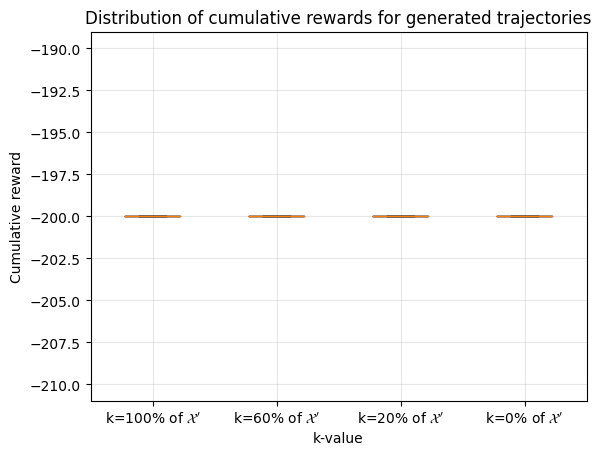

In [17]:
cum_rewards_control = nb_utils.get_cumulative_rewards(trajectories_control, agents_control)
nb_utils.plot_cum_rewards(cum_rewards_control)
# plt.gca().set_ylim([-100, -10])

In [ ]:
pd.DataFrame(cum_rewards_fixed_pi).describe()

,100,60,20,0
count,50.0,50.0,50.0,50.0
mean,-200.0,-200.0,-200.0,-200.0
std,0.0,0.0,0.0,0.0
min,-200.0,-200.0,-200.0,-200.0
25%,-200.0,-200.0,-200.0,-200.0
50%,-200.0,-200.0,-200.0,-200.0
75%,-200.0,-200.0,-200.0,-200.0
max,-200.0,-200.0,-200.0,-200.0


In [ ]:
accs_by_k_fixed_pi = nb_utils.compute_accuracy_by_kval(test_data=test_data, agents=agents_fixed_pi)

50it [00:08,  6.22it/s]


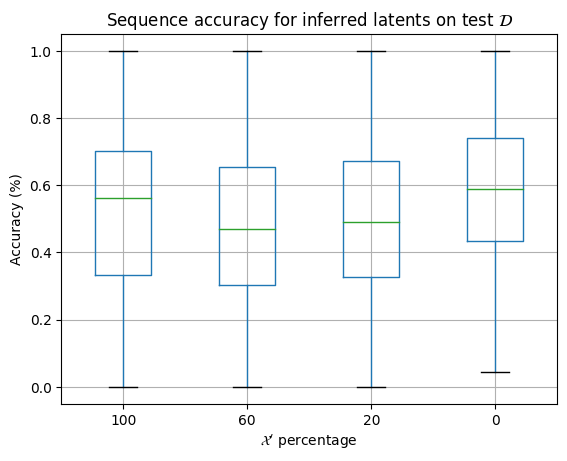

In [ ]:
nb_utils.plot_sequence_accuracy_boxplot(accs_by_k_fixed_pi)

In [ ]:
pd.DataFrame(accs_by_k_fixed_pi).describe()

,100,60,20,0
count,250.000000,250.000000,250.000000,250.000000
mean,0.528204,0.468221,0.500402,0.581118
std,0.236021,0.231161,0.228577,0.222254
min,0.000000,0.000000,0.000000,0.043478
25%,0.333333,0.302637,0.326198,0.432559
50%,0.560488,0.469337,0.489996,0.588235
75%,0.702128,0.655172,0.670977,0.740338
max,1.000000,1.000000,1.000000,1.000000


# Visuals for comparing aganist `randomized` benchmark

Remove the `fixed_pi` models from the analysis for now, because there seems to be a bug in the way it is sampling actions from the expert. This is affecting the macro-policy learning.

Compare the learned model using the extra synth trajectories with the `randomized` benchmark.

- Run a hypotehsis test to check significant mean difference between the cumulative rewards of the models
- For same `k` values:
    - plot the **mean cumulative rewards** of the models, with the shaded area showing the standard deviation.
    - plot the **lengths of the trajectories generated** by the models under each regime (`random` and `entropy scoring`)
    - plot the **accuracy for latent prediction** on a test set